# Spam Email Analysis with Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
spam = pd.read_csv('/content/spam.csv') # data set read

In [3]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam.shape

(5572, 2)

In [5]:
#spam.describe()

In [6]:
spam.groupby(spam['Category']).size()

,0
Category,
ham,4825
spam,747


We have a total of 5572 data. There are %83 safe and %17 spam.

In [7]:
spam.Category = spam.Category.apply(lambda x: 1 if x == 'spam' else 0)

We changed the spam values in the Category column with 1 and the raw values with 0.

In [8]:
spam.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages = spam.iloc[:,1] # Messages column select all rows and 2nd column

In [10]:
messages.head() # The code messages.head() returns the first five (head) rows of the messages series. The head method is used to return the first n rows of a Pandas series or dataframe. By default, head returns the first five rows, but you can specify a different number by passing it as an argument, for example messages.head(10) would return the first 10 rows.

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
ifSpam = spam.iloc[:,0] # Spam column # The code ifSpam = spam.iloc[:,0] is selecting all rows (:) and first column (0) of a dataframe called spam and storing it as a series in the ifSpam variable. The .iloc accessor is used to extract data from a Pandas dataframe based on index location.

In [12]:
ifSpam.head()

,Category
0,0
1,0
2,1
3,0
4,0


In [13]:
messages_train, messages_test, ifSpam_train, ifSpam_test = train_test_split(messages, ifSpam, test_size=0.25)

We will use 75% of our dataset for training and 25% for testing

In [14]:
cv = CountVectorizer()

With CountVectorizer, text is analyzed and word counts are made and these are converted into vectors.

In [15]:
features = cv.fit_transform(messages_train)

In [16]:
features_test = cv.transform(messages_test)

# Learning and Predicts

In [17]:
knModel = KNeighborsClassifier(n_neighbors=1) # creating an instance of the KNeighborsClassifier

In [18]:
knModel.fit(features, ifSpam_train) # The code knModel.fit(features, ifSpam_train) is training the knModel on the training data. The fit method is used to train a machine learning model on a given dataset.

KNeighborsClassifier(n_neighbors=1)

In [19]:
knPredict = knModel.predict(features_test) # The code knPredict = knModel.predict(features_test) is using the trained knModel to make predictions on the test data. The predict method is used to make predictions using a trained machine learning model on a given dataset.

In [20]:
dtModel = tree.DecisionTreeClassifier()

In [21]:
dtModel.fit(features, ifSpam_train)

DecisionTreeClassifier()

In [22]:
dtPredict = dtModel.predict(features_test)

In [23]:
svModel = svm.SVC()

In [24]:
svModel.fit(features,ifSpam_train)

SVC()

In [25]:
svPredict = svModel.predict(features_test)

In [26]:
rfModel = RandomForestClassifier()

In [27]:
rfModel.fit(features, ifSpam_train)

RandomForestClassifier()

In [28]:
rfPredict = rfModel.predict(features_test)

# Visualization

In [38]:
!pip install --upgrade scikit-learn


In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


In [43]:
def visualization(model):
    predict = model.predict(features_test)
    ConfusionMatrixDisplay.from_estimator(model,features_test,ifSpam_test)
    PrecisionRecallDisplay.from_estimator(model,features_test,ifSpam_test)
    RocCurveDisplay.from_estimator(model,features_test,ifSpam_test)

# Results

### K-Nearest Neighbors

In [44]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0],
                                                                      (ifSpam_test != knPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 71


In [45]:
successRate = 100.0 * f1_score(ifSpam_test, knPredict, average='micro') # The code successRate = 100.0 * f1_score(ifSpam_test, knPredict, average='micro') is calculating the success rate of the knModel on the test data.

# The f1_score function is used to calculate the F1 score, which is a measure of a classifier's accuracy. The F1 score is the harmonic mean of precision and recall, where precision is the fraction of relevant instances among the retrieved instances, and recall is the fraction of relevant instances that have been retrieved.

# The ifSpam_test argument is the true target values of the test data, and knPredict argument is the predicted target values made by the knModel. The average parameter is set to 'micro', which specifies that a single F1 score should be returned for all classes, rather than one score per class.

# Finally, the success rate is calculated by multiplying the F1 score by 100 to convert it to a percentage. The success rate is stored in the successRate variable.





In [46]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")

The Success Rate was calculated as % : 94.90308686288586 with the K-Nearest-Neighbors


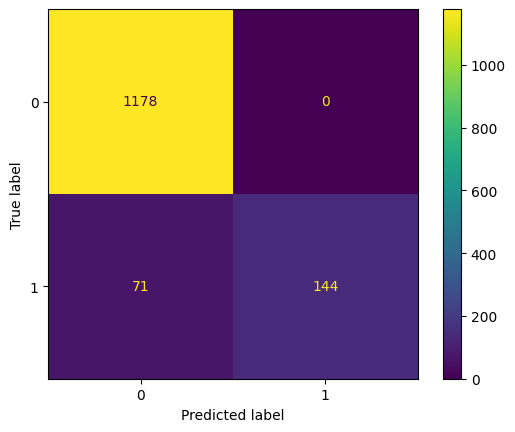

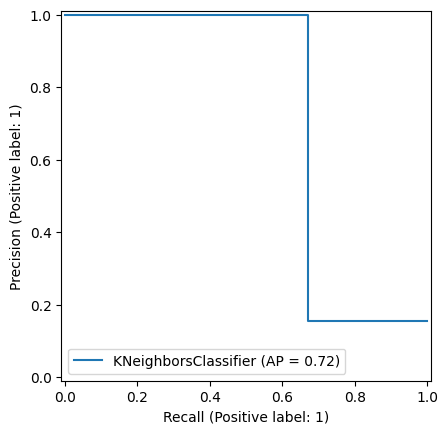

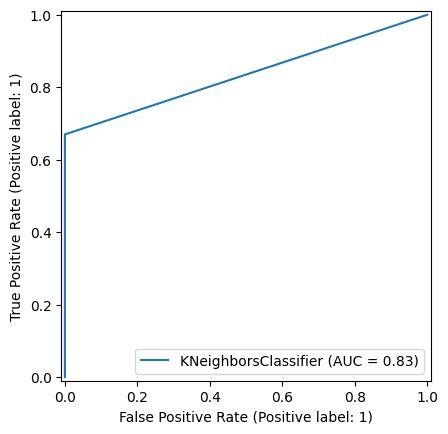

In [47]:
visualization(knModel)

### Random Forest

In [48]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0],
                                                                      (ifSpam_test != rfPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 38


In [49]:
successRate = 100.0 * f1_score(ifSpam_test, rfPredict, average='micro')

In [50]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Random Forest")

The Success Rate was calculated as % : 97.27207465900933 with Random Forest


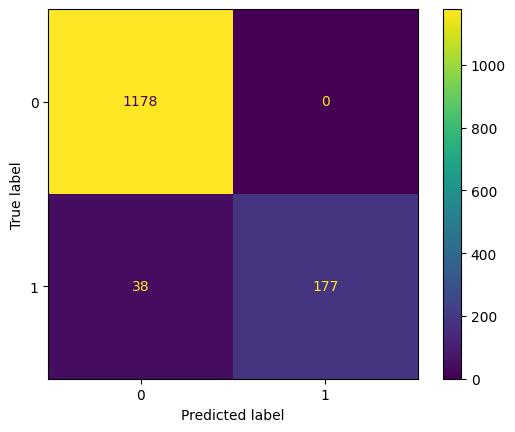

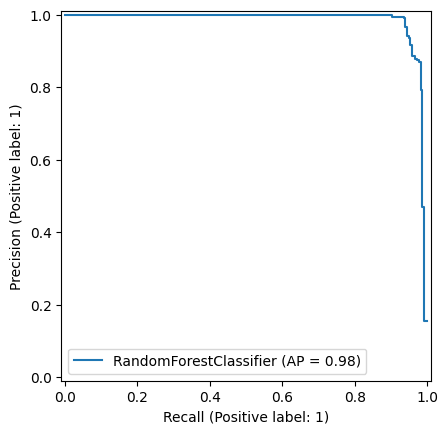

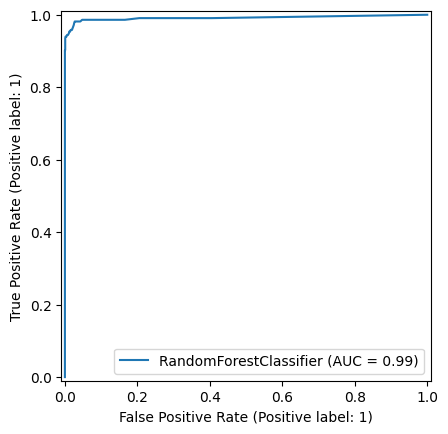

In [51]:
visualization(rfModel)

### Decision Tree

In [52]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0],
                                                                      (ifSpam_test != dtPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 48


In [53]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')

In [54]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 96.55419956927494 with Decision Tree


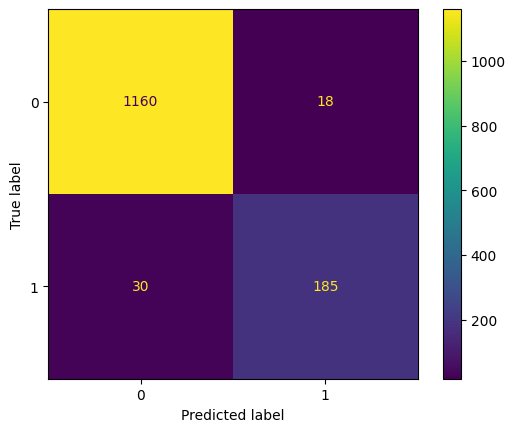

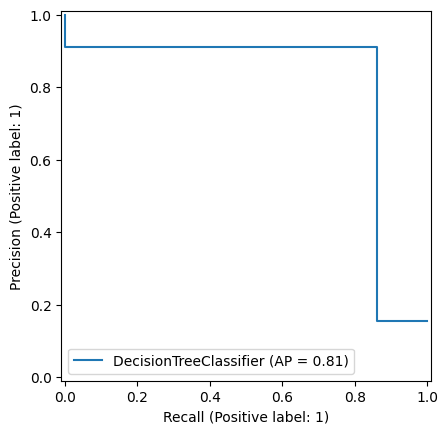

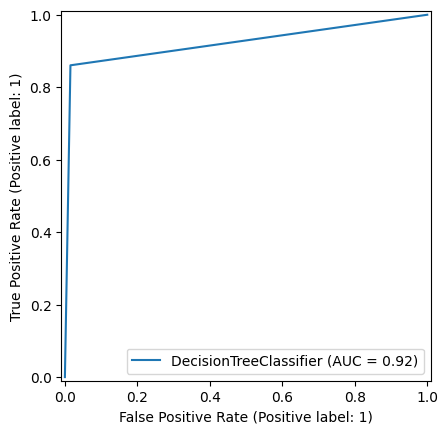

In [55]:
visualization(dtModel)

### Support Vector Machine

In [56]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0],
                                                                      (ifSpam_test != svPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 26


In [57]:
successRate = 100.0 * f1_score(ifSpam_test, svPredict, average='micro')

In [ ]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Support Vector Machine")

The Success Rate was calculated as % : 97.84637473079684 with Support Vector Machine


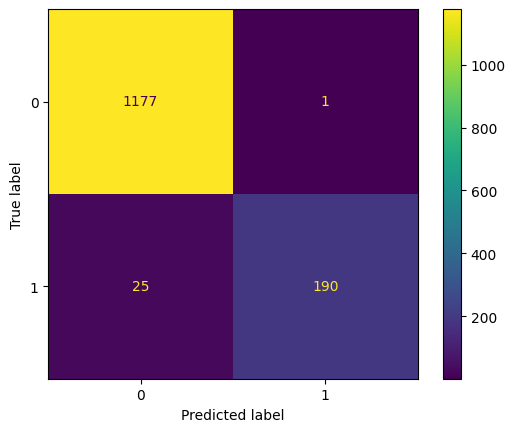

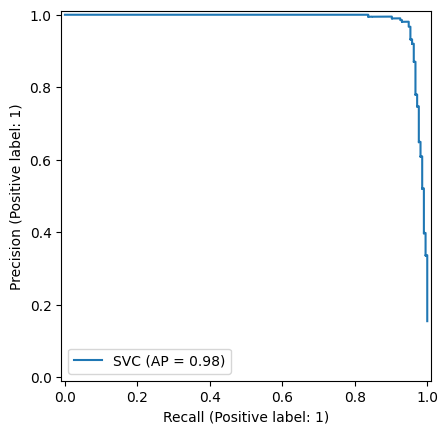

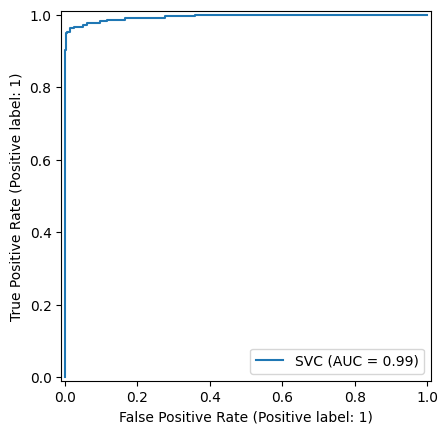

In [58]:
visualization(svModel)

In [60]:
User Input Mail Data

SyntaxError: invalid syntax (<ipython-input-60-8473c0d1ce9e>, line 1)

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
flag = 0

while True:
    raw_mail_data = pd.read_csv('/content/spam.csv')

#print(raw_mail_data)

# replace the null values with a null string
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

# printing the first 5 rows of the dataframe
    mail_data.head()

# checking the number of rows and columns in the dataframe
    mail_data.shape

# label spam mail as 0;  ham mail as 1;

    mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
    mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

# separating the data as texts and label

    X = mail_data['Message']

    Y = mail_data['Category']
#---------------------------------------------------------------------------------------------------------
#print(X)

#print(Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

#print(X.shape)
#print(X_train.shape)
#print(X_test.shape)

# transform the text data to feature vectors that can be used as input to the Logistic regression

    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

    Y_train = Y_train.astype('int')
    Y_test = Y_test.astype('int')


#print(X_train)
#print(X_train_features)

    model = LogisticRegression()

# training the Logistic Regression model with the training data
    model.fit(X_train_features, Y_train)

# prediction on training data

    prediction_on_training_data = model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

#print('Accuracy on training data : ', accuracy_on_training_data)

# prediction on test data

    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

#print('Accuracy on test data : ', accuracy_on_test_data)

#---------------------------------USER INPUT --------------------------------------

#input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

    input_mail = ['']

    if flag == 0:
# load the CSV file into a Pandas dataframe
        data = pd.read_csv('/content/spam.csv')

# get the number of rows in the dataframe
        num_rows = len(data)

# randomly select an index between 0 and the number of rows minus 1
        random_index = random.randint(0, num_rows-1)

# retrieve the second column of the randomly selected row
        input_mail[0] = data.iloc[random_index, 1]

# print the result
        print("MAIL MESSAGE : "+input_mail[0])


    else:
        flag = 1;

        input_msg = input("Enter Mail Message : ")
        input_mail[0] = input_msg

    # check if the user wants to exit
        if input_msg.lower() == "exit":
            break


#input_mail = ["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

# convert text to feature vectors
    input_data_features = feature_extraction.transform(input_mail)
    flag = 1;
# making prediction

    prediction = model.predict(input_data_features)
#print(prediction)


    if (prediction[0]==1):
      print('The Received Mail is Genuine.')

    else:
      print('The Recieved Mail is Spam.')

MAIL MESSAGE : Sorry, it's a lot of friend-of-a-friend stuff, I'm just now about to talk to the actual guy who wants to buy
The Received Mail is Genuine.
Enter Mail Message :  Chess.com header logo ChessDiver Bots Defend The Chess Universe The freedom and democracy of chess is at stake. Do your part, band together with the community, and save the known chess universe from destruction! Play the ChessDivers bots this month only. The more games Chess.‌com members win against these automatons and aliens, the better our chance of survival. Be careful, some otherworldly reinforcements may be coming soon… Scanner Scanner A defensive opponent. The Scanner is designed to gather information about your chess skills. Challenge Scanner Fighter Fighter A well-balanced, second-generation automaton designed to defeat most intermediate chess players. Challenge Fighter Pincer Pincer A tough positional chess player. The Pincer will squeeze you over the board until you resign. Challenge Pincer Join the fi

KeyboardInterrupt: Interrupted by user

In [62]:
from platform import python_version
print(python_version())

3.10.12
